In [8]:
from sklearn.decomposition import PCA
from deconv.imports import load_tables, load_figures, load_bindingData
import matplotlib.pyplot as plt
from deconv.figures.common import subplotLabel, getSetup
import pandas as pd

Text(0, 0.5, 'Component 2')

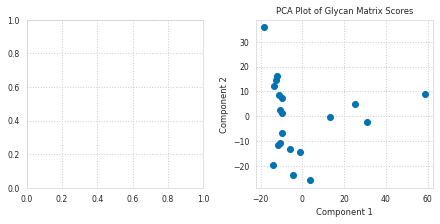

In [5]:
ax, f = getSetup((6, 3), (1, 2))

A_antiD, A_antitnp, glycans, _ = load_tables()
pca = PCA(n_components=2)
pca.fit(A_antiD)
pca.fit(A_antitnp)

A_antiD_new = pca.transform(A_antiD)
A_antiD_new.shape
plt.scatter(A_antiD_new[:,0], A_antiD_new[:,1])
plt.title("PCA Plot of Glycan Matrix Scores")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

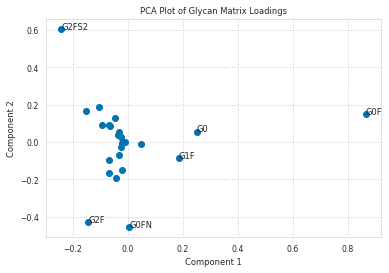

In [6]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=glycans)
plt.scatter(loadings.iloc[:,0], loadings.iloc[:,1])
plt.title("PCA Plot of Glycan Matrix Loadings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
index = [0,1,2,3,8,12]
for i in index:
    plt.annotate(glycans[i], (loadings.iloc[i,0], loadings.iloc[i,1]))

(20, 4)


Text(0, 0.5, 'Component 2')

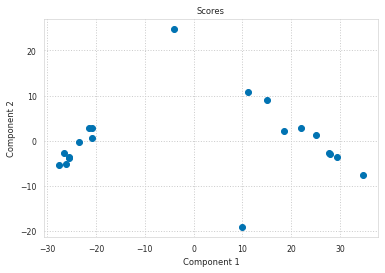

In [41]:
import numpy as np
pca2 = PCA(n_components=2)

adcc3a, adcc3b = load_figures()
bindingE = pd.read_csv("./deconv/data/Fig2E-FcgRIIIa-158F.csv")
bindingF = pd.read_csv("./deconv/data/Fig2F-FcgRIIIa-158V.csv")

mean_3a = (adcc3a.groupby(level=0).sum()) / 4
mean_3b = (adcc3b.groupby(level=0).sum()) / 4
bindingEMean = np.nanmean(bindingE, axis=0)
bindingFMean = np.nanmean(bindingF, axis=0)

data = []
data.append(mean_3a)
data.append(mean_3b)
data.append(bindingEMean)
data.append(bindingFMean)
data2 = np.transpose(np.array(data))
print(data2.shape)

pca2.fit(data2)
data_new = pca2.transform(data2)
data_new.shape
plt.scatter(data_new[:,0], data_new[:,1])
plt.title("Scores")
plt.xlabel("Component 1")
plt.ylabel("Component 2")


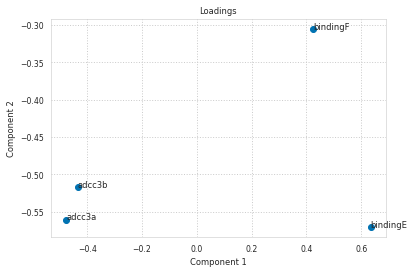

In [42]:
l = ['adcc3a', 'adcc3b', 'bindingE', 'bindingF']
loadings = pd.DataFrame(pca2.components_.T, columns=['PC1', 'PC2'], index=l)
plt.scatter(loadings.iloc[:,0], loadings.iloc[:,1])
plt.title("Loadings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
#index = [0,1,2,3,8,12]
for i in range(4):
    plt.annotate(l[i], (loadings.iloc[i,0], loadings.iloc[i,1]))